In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
m = sm.datasets.anes96
df = m.load_pandas().data
df_raw = df

In [4]:
# smf.logit('vote ~ PID + selfLR', df).fit().summary()
# smf.logit('vote ~ PID + selfLR + ClinLR', df).fit().summary()
# smf.logit('vote ~ PID + selfLR + ClinLR + income', df).fit().summary()
# smf.logit('vote ~ PID + selfLR + ClinLR + logpopul', df).fit().summary()
# smf.logit('vote ~ PID + selfLR + ClinLR + logpopul + educ', df).fit().summary()
# smf.logit('vote ~ PID + selfLR + ClinLR + logpopul + age', df).fit().summary()
smf.logit('vote ~ PID + selfLR + ClinLR + logpopul', df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.232166
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   vote   No. Observations:                  944
Model:                          Logit   Df Residuals:                      939
Method:                           MLE   Df Model:                            4
Date:                Sat, 02 May 2020   Pseudo R-squ.:                  0.6581
Time:                        09:43:18   Log-Likelihood:                -219.17
converged:                       True   LL-Null:                       -641.05
Covariance Type:            nonrobust   LLR p-value:                2.545e-181
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7955      0.597     -6.361      0.000      -4.965      -2.626
PID            1.0031      0.078     12.853      0.000       0.850       1.156
selfLR         0.5812      0.115      5.032      0.000       0.355       0.808
ClinLR        -0.7481      0.107     -7.014      0.000      -0.957      -0.539
logpopul      -0.0848      0.040     -2.146      0.032      -0.162      -0.007
==============================================================================
"""

In [5]:
res = smf.logit('vote ~ PID + selfLR + ClinLR + logpopul', df).fit()
res.predict(dict(PID=2, selfLR=3, ClinLR=2, logpopul=-2.302585))

Optimization terminated successfully.
         Current function value: 0.232166
         Iterations 8


0    0.206453
dtype: float64

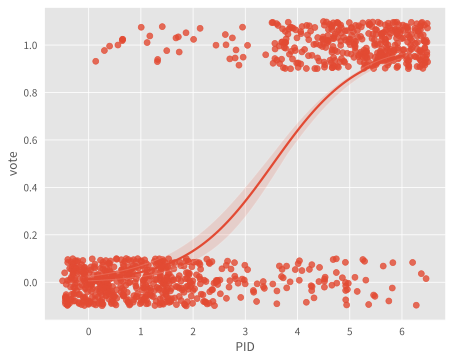

In [6]:
df = df_raw
sns.regplot(data=df,
            x='PID',
            y='vote',
            logistic=True, n_boot=10,
            x_jitter=0.5, y_jitter=0.1)